# 一起来打怪之 Credit Scoring 练习

-------
## >>>说明：
### 1. 答题步骤：
- 回答问题**请保留每一步**操作过程，请不要仅仅给出最后答案
- 请养成代码注释的好习惯

### 2. 解题思路：
- 为方便大家准确理解题目，在习题实战中有所收获，本文档提供了解题思路提示
- 解题思路**仅供参考**，鼓励原创解题方法
- 为督促同学们自己思考，解题思路内容设置为**注释**，请注意查看

### 3. 所用数据：
- 问题使用了多个数据库，请注意导入每个数据库后都先**查看和了解数据的基本性质**，后面的问题不再一一提醒

--------
## 操作题

### 信用卡欺诈项目

 #### 前期数据导入,预览及处理(此部分勿修改，涉及的数据文件无需复制移动)

In [1]:
import pandas as pd
pd.set_option('display.max_columns', 500)
import zipfile
with zipfile.ZipFile('KaggleCredit2.csv.zip', 'r') as z:
    f = z.open('KaggleCredit2.csv')
    data = pd.read_csv(f, index_col=0)
data.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45.0,2.0,0.802982,9120.0,13.0,0.0,6.0,0.0,2.0
1,0,0.957151,40.0,0.0,0.121876,2600.0,4.0,0.0,0.0,0.0,1.0
2,0,0.658180,38.0,1.0,0.085113,3042.0,2.0,1.0,0.0,0.0,0.0
3,0,0.233810,30.0,0.0,0.036050,3300.0,5.0,0.0,0.0,0.0,0.0
4,0,0.907239,49.0,1.0,0.024926,63588.0,7.0,0.0,1.0,0.0,0.0


In [2]:
# 检查数据维度
data.shape

(112915, 11)

In [3]:
# 查看数据缺失值情况
data.isnull().sum(axis=0)

SeriousDlqin2yrs                           0
RevolvingUtilizationOfUnsecuredLines       0
age                                     4267
NumberOfTime30-59DaysPastDueNotWorse       0
DebtRatio                                  0
MonthlyIncome                              0
NumberOfOpenCreditLinesAndLoans            0
NumberOfTimes90DaysLate                    0
NumberRealEstateLoansOrLines               0
NumberOfTime60-89DaysPastDueNotWorse       0
NumberOfDependents                      4267
dtype: int64

In [4]:
# 清除缺失值
data.dropna(inplace=True)
#data.shapey = data['SeriousDlqin2yrs']
X = data.drop('SeriousDlqin2yrs', axis=1)

In [5]:
# 取出对应的X和y
y = data['SeriousDlqin2yrs']
X = data.drop('SeriousDlqin2yrs', axis=1)
# 查看平均的欺诈率
y.mean()

0.06742876076872101

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

### 以下为操作题

#### 1.把数据切分成训练集和测试集

In [7]:
# 提示：查看train_test_split函数
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=20)

# 查看数据的维度
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((86918, 10), (21730, 10), (86918,), (21730,))

SeriousDlqin2yrs
0    101322
1      7326
Name: count, dtype: int64


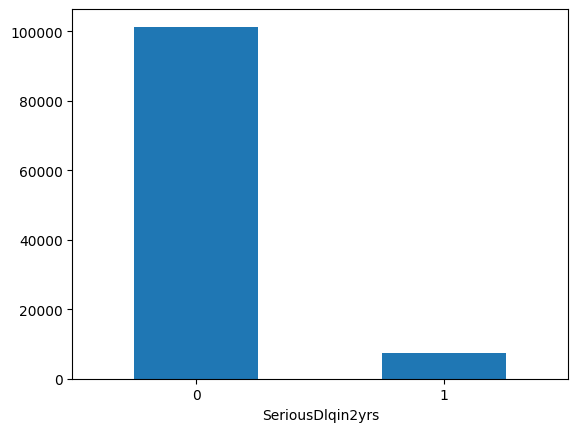

In [8]:
# 通过SeriousDlqin2yrs字段查看正负样本分布情况
# 提示：value_counts
YN_dist = data.SeriousDlqin2yrs.value_counts()
print(YN_dist)
# 绘制两种类别的柱状图
# 提示：dataframe可以直接plot(kind='bar')
YN_dist.plot(kind='bar')
plt.xticks(rotation = 0)
plt.show()

#### 2.数据预处理之离散化

In [9]:
# 请对年龄按照3岁一个区间进行离散化
# 提示：可以先计算出分桶边界，再基于pandas的cut函数进行离散化(分箱、分桶)
data.age.describe()

count    108648.000000
mean         51.361304
std          14.453571
min           0.000000
25%          41.000000
50%          51.000000
75%          62.000000
max         103.000000
Name: age, dtype: float64

In [10]:
# there is age = 0, check all the items with age = 0
data[data.age == 0]

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
49426,0,1.0,0.0,1.0,0.436927,6000.0,6.0,0.0,2.0,0.0,2.0


In [11]:
data = data[data.age > 0]
data.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,108647.000000,108647.000000,108647.000000,108647.000000,108647.000000,1.086470e+05,108647.000000,108647.000000,108647.000000,108647.000000,108647.000000
mean,0.067429,5.989741,51.361777,0.378630,0.306236,6.964377e+03,8.679080,0.213490,1.015316,0.188666,0.856563
std,0.250765,259.793611,14.452797,3.525296,0.222925,1.492426e+04,5.128137,3.493382,1.077679,3.476211,1.149537
min,0.000000,0.000000,21.000000,0.000000,0.000000,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.034318,41.000000,0.000000,0.133492,3.640000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.172894,51.000000,0.000000,0.278308,5.600000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.570853,62.000000,0.000000,0.440113,8.416000e+03,11.000000,0.000000,2.000000,0.000000,2.000000
max,1.000000,50708.000000,103.000000,98.000000,0.999909,3.008750e+06,57.000000,98.000000,29.000000,98.000000,20.000000


In [12]:
pd.cut(data.age, bins = range(21, 103, 3), right = False)

0         [45, 48)
1         [39, 42)
2         [36, 39)
3         [30, 33)
4         [48, 51)
            ...   
112910    [48, 51)
112911    [72, 75)
112912    [42, 45)
112913    [30, 33)
112914    [63, 66)
Name: age, Length: 108647, dtype: category
Categories (27, interval[int64, left]): [[21, 24) < [24, 27) < [27, 30) < [30, 33) ... [90, 93) < [93, 96) < [96, 99) < [99, 102)]

In [13]:
data['age_interval'] = pd.cut(data.age, bins = range(21, 103, 3), right = False)
data

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,age_interval
0,1,0.766127,45.0,2.0,0.802982,9120.0,13.0,0.0,6.0,0.0,2.0,"[45, 48)"
1,0,0.957151,40.0,0.0,0.121876,2600.0,4.0,0.0,0.0,0.0,1.0,"[39, 42)"
2,0,0.658180,38.0,1.0,0.085113,3042.0,2.0,1.0,0.0,0.0,0.0,"[36, 39)"
3,0,0.233810,30.0,0.0,0.036050,3300.0,5.0,0.0,0.0,0.0,0.0,"[30, 33)"
4,0,0.907239,49.0,1.0,0.024926,63588.0,7.0,0.0,1.0,0.0,0.0,"[48, 51)"
...,...,...,...,...,...,...,...,...,...,...,...,...
112910,0,0.385742,50.0,0.0,0.404293,3400.0,7.0,0.0,0.0,0.0,0.0,"[48, 51)"
112911,0,0.040674,74.0,0.0,0.225131,2100.0,4.0,0.0,1.0,0.0,0.0,"[72, 75)"
112912,0,0.299745,44.0,0.0,0.716562,5584.0,4.0,0.0,1.0,0.0,2.0,"[42, 45)"
112913,0,0.000000,30.0,0.0,0.000000,5716.0,4.0,0.0,0.0,0.0,0.0,"[30, 33)"


In [14]:
# after removing the items with age = 0, redo the splitting
# 取出对应的X和y
y = data['SeriousDlqin2yrs']
X = data.drop(['SeriousDlqin2yrs', 'age'], axis=1)# remove age column because there is already one age interval
# 查看平均的欺诈率
print(y.mean())
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=20)

# 查看数据的维度
X_train.shape, X_test.shape, y_train.shape, y_test.shape

0.06742938139111065


((86917, 10), (21730, 10), (86917,), (21730,))

In [15]:
X_train

,RevolvingUtilizationOfUnsecuredLines,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,age_interval
13684,1.211577,3.0,0.483971,2900.0,5.0,0.0,1.0,0.0,0.0,"[57, 60)"
3911,0.663491,0.0,0.270821,8200.0,9.0,0.0,1.0,0.0,2.0,"[39, 42)"
95455,1.000000,0.0,0.081199,1600.0,1.0,0.0,0.0,0.0,1.0,"[24, 27)"
37953,0.941068,1.0,0.356192,1501.0,4.0,0.0,0.0,0.0,0.0,"[24, 27)"
460,0.000000,0.0,0.238076,10000.0,6.0,0.0,1.0,0.0,0.0,"[51, 54)"
...,...,...,...,...,...,...,...,...,...,...
33263,0.000550,0.0,0.391703,7737.0,10.0,0.0,1.0,0.0,0.0,"[60, 63)"
92516,0.195038,1.0,0.472240,4700.0,15.0,0.0,3.0,0.0,0.0,"[57, 60)"
24744,0.640088,0.0,0.288606,8890.0,16.0,0.0,1.0,0.0,1.0,"[42, 45)"
38655,0.148648,0.0,0.697041,5508.0,15.0,0.0,2.0,0.0,0.0,"[54, 57)"


#### 3.数据预处理之独热向量编码

In [16]:
# 请对上述分箱后的年龄段进行独热向量编码
# 提示：使用pandas的get_dummies完成
X_train = pd.get_dummies(X_train, columns = ['age_interval'], dtype = 'float')
X_train

,RevolvingUtilizationOfUnsecuredLines,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,"age_interval_[21, 24)","age_interval_[24, 27)","age_interval_[27, 30)","age_interval_[30, 33)","age_interval_[33, 36)","age_interval_[36, 39)","age_interval_[39, 42)","age_interval_[42, 45)","age_interval_[45, 48)","age_interval_[48, 51)","age_interval_[51, 54)","age_interval_[54, 57)","age_interval_[57, 60)","age_interval_[60, 63)","age_interval_[63, 66)","age_interval_[66, 69)","age_interval_[69, 72)","age_interval_[72, 75)","age_interval_[75, 78)","age_interval_[78, 81)","age_interval_[81, 84)","age_interval_[84, 87)","age_interval_[87, 90)","age_interval_[90, 93)","age_interval_[93, 96)","age_interval_[96, 99)","age_interval_[99, 102)"
13684,1.211577,3.0,0.483971,2900.0,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3911,0.663491,0.0,0.270821,8200.0,9.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
95455,1.000000,0.0,0.081199,1600.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
37953,0.941068,1.0,0.356192,1501.0,4.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
460,0.000000,0.0,0.238076,10000.0,6.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33263,0.000550,0.0,0.391703,7737.0,10.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
92516,0.195038,1.0,0.472240,4700.0,15.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24744,0.640088,0.0,0.288606,8890.0,16.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
38655,0.148648,0.0,0.697041,5508.0,15.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
X_test = pd.get_dummies(X_test, columns = ['age_interval'], dtype = 'float')
X_test

,RevolvingUtilizationOfUnsecuredLines,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,"age_interval_[21, 24)","age_interval_[24, 27)","age_interval_[27, 30)","age_interval_[30, 33)","age_interval_[33, 36)","age_interval_[36, 39)","age_interval_[39, 42)","age_interval_[42, 45)","age_interval_[45, 48)","age_interval_[48, 51)","age_interval_[51, 54)","age_interval_[54, 57)","age_interval_[57, 60)","age_interval_[60, 63)","age_interval_[63, 66)","age_interval_[66, 69)","age_interval_[69, 72)","age_interval_[72, 75)","age_interval_[75, 78)","age_interval_[78, 81)","age_interval_[81, 84)","age_interval_[84, 87)","age_interval_[87, 90)","age_interval_[90, 93)","age_interval_[93, 96)","age_interval_[96, 99)","age_interval_[99, 102)"
106733,0.630174,0.0,0.063956,6566.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
56858,1.000000,0.0,0.000000,4028.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24368,0.140387,0.0,0.358044,7769.0,13.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35013,0.715714,0.0,0.580583,6725.0,7.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
55681,0.260136,0.0,0.029878,3279.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26207,0.026276,1.0,0.289605,3010.0,5.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
82384,0.018951,0.0,0.005703,5610.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3579,0.139274,0.0,0.652539,2500.0,7.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
103587,0.694550,0.0,0.179582,10000.0,15.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### 4.数据预处理之幅度缩放

In [18]:
# 请对连续值特征进行幅度缩放
# 提示：可以使用StandardScaler等幅度缩放器进行处理
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train_std = scaler.transform(X_train)
print('X_train_std:\n', X_train_std)
X_test_std = scaler.transform(X_test)
print('X_train_std:\n', X_test_std)

X_train_std:
 [[-0.01709063  0.75377938  0.79431878 ... -0.02714548 -0.01313804
  -0.00758482]
 [-0.01911843 -0.10792873 -0.16002309 ... -0.02714548 -0.01313804
  -0.00758482]
 [-0.01787342 -0.10792873 -1.00901804 ... -0.02714548 -0.01313804
  -0.00758482]
 ...
 [-0.01920502 -0.10792873 -0.08039032 ... -0.02714548 -0.01313804
  -0.00758482]
 [-0.02102324 -0.10792873  1.74830134 ... -0.02714548 -0.01313804
  -0.00758482]
 [-0.01782092  0.1793073  -0.59323405 ... -0.02714548 -0.01313804
  -0.00758482]]
X_train_std:
 [[-0.0192417  -0.10792873 -1.08622088 ... -0.02714548 -0.01313804
  -0.00758482]
 [-0.01787342 -0.10792873 -1.37257278 ... -0.02714548 -0.01313804
  -0.00758482]
 [-0.0210538  -0.10792873  0.23050246 ... -0.02714548 -0.01313804
  -0.00758482]
 ...
 [-0.02105792 -0.10792873  1.5490508  ... -0.02714548 -0.01313804
  -0.00758482]
 [-0.01900352 -0.10792873 -0.56852713 ... -0.02714548 -0.01313804
  -0.00758482]
 [-0.02156583 -0.10792873 -0.8243053  ... -0.02714548 -0.01313804
  -0

#### 5.使用logistic regression建模，并且输出一下系数，分析重要度。   

In [23]:
# 提示：fit建模，建完模之后可以取出coef属性
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train_std, y_train)

LogisticRegression()

In [43]:
#lr_score = lr.score(X_train_std, y_train)
#print('lr')
#np.size(X_train.columns)
#lr.coef_.shape
#lr.coef_
#lr.intercept_[0]
print('Coefficient: \n' %lr.coef_[0])
print('Intercept: %.3f\n' %lr.intercept_[0])

Coefficient: 

Intercept: -2.866



In [49]:
print('Coefficient: \n', lr.coef_[0])
print('Intercept: %.3f\n' %lr.intercept_[0])

Coefficient: 
 [-1.23704895e-02  1.65130342e+00  3.14815817e-01 -8.68244083e-02
 -1.23289061e-01  1.52815609e+00 -2.11174917e-01 -3.00647305e+00
  9.31338468e-02  4.41422880e-02  8.79439384e-02  1.04597284e-01
  9.90661129e-02  9.32926943e-02  7.18181967e-02  7.05998324e-02
  5.33789080e-02  5.02338100e-02  5.78350102e-02  3.95830604e-02
  1.54574905e-03 -3.37592054e-02 -3.97091617e-02 -1.07845808e-01
 -1.23349182e-01 -1.17783225e-01 -8.43047873e-02 -1.30855901e-01
 -9.47846718e-02 -8.77216593e-02 -6.29954814e-02 -1.63038266e-02
 -2.93874687e-02 -2.59236316e-01 -1.27489200e-01  1.93729750e-02]
Intercept: -2.866



In [51]:
lr_score = lr.score(X_train_std, y_train)
print('Accuracy: ',lr_score)

Accuracy:  0.9328094619004338


#### 6.使用网格搜索交叉验证进行调参
调整penalty和C参数，其中penalty候选为"l1"和"l2"，C的候选为[1,10,100,500]

In [53]:
# 提示：先按照上面要求准备好网格字典，再使用GridSearchCV进行调参
from sklearn.model_selection import GridSearchCV

#准备网格字典
param_grid = {
    'penalty': ['l1', 'l2'], # 两种正则化方式
    'C':  [1,10,100,500] #正则项系数的倒数
}
param_grid

{'penalty': ['l1', 'l2'], 'C': [1, 10, 100, 500]}

In [60]:
# 初始化并实例化GridSearchCV的对象
# estimator is LogisticRegression, penalty是L1正则化的话，就只能选择‘liblinear’.  5-fold cross validation
grid_search = GridSearchCV(LogisticRegression(solver = 'liblinear'), param_grid, cv = 5)
# 参数拟合
grid_search.fit(X_train_std, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(solver='liblinear'),
             param_grid={'C': [1, 10, 100, 500], 'penalty': ['l1', 'l2']})

In [62]:
# 输出最好的超参数
# 输出最好的模型
print(grid_search.best_params_)
print(grid_search.best_score_)
print(grid_search.best_estimator_)


{'C': 1, 'penalty': 'l2'}
0.9327174185579274
LogisticRegression(C=1, solver='liblinear')


#### 7.在测试集上进行预测，计算 查准率/查全率/auc/混淆矩阵/f1值 等测试指标

In [66]:
# 提示：在测试集上预测可以使用predict
# 提示：各种指标可以在sklearn.metrics中查到各种评估指标，分别是accuracy_score、recall_score、auc、confusion_matrix、f1_score
from sklearn import metrics

best_lr = grid_search.best_estimator_
y_pred = best_lr.predict(X_test_std)
y_pred_proba = best_lr.predict_proba(X_test_std) # for auc conculation 

print('accuracy score: ', metrics.accuracy_score(y_test, y_pred))
print('recall score: ', metrics.recall_score(y_test, y_pred))
print('auc: ', metrics.roc_auc_score(y_test, y_pred_proba[:,1]))# AUC（Area Under Curve）被定义为ROC曲线下与坐标轴围成的面积，AUC越接近1.0，检测方法真实性越高
print('confusion matrix: \n', metrics.confusion_matrix(y_test, y_pred))
print('f1 score: ', metrics.f1_score(y_test, y_pred))#the harmonic mean of precision and recall, a measure of predictive performance


accuracy score:  0.9352047860101242
recall score:  0.034066713981547196
auc:  0.704504012934488
confusion matrix: 
 [[20274    47]
 [ 1361    48]]
f1 score:  0.06382978723404256


#### 8.更多优化
银行通常会有更严格的要求，因为欺诈带来的后果通常比较严重，一般我们会调整模型的标准。   

比如在logistic regression当中，一般我们的概率判定边界为0.5，但是我们可以把阈值设定低一些，来提高模型的“敏感度”   
试试看把阈值设定为0.3，再看看这个时候的混淆矩阵等评估指标。

In [73]:
# 提示：thresholds = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
# 根据predict_proba的结果和threshold的比较确定结果，再评估各种结果指标

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix, f1_score

df_threshold = pd.DataFrame(columns = ['threshold', 'accuracy', 'recall', 'confusion matrix', 'f1'])

thresholds = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

for threshold in thresholds:  
    y_pred_threshold = (best_lr.predict_proba(X_test_std)[:,1] > threshold).astype(int)
    accurracy = accuracy_score(y_test, y_pred_threshold)
    #precision = precision_score(y_test, y_pred_threshold)
    recall = recall_score(y_test, y_pred_threshold)
    cm = confusion_matrix(y_test, y_pred_threshold)
    f1 = f1_score(y_test, y_pred_threshold)
    df_threshold.loc[len(df_threshold.index)] = [threshold, accurracy, recall, cm, f1]

df_threshold    

,threshold,accuracy,recall,confusion matrix,f1
0,0.1,0.848734,0.426544,"[[17842, 2479], [808, 601]]",0.267766
1,0.2,0.929498,0.166075,"[[19964, 357], [1175, 234]]",0.234000
2,0.3,0.934975,0.093683,"[[20185, 136], [1277, 132]]",0.157424
3,0.4,0.935573,0.053939,"[[20254, 67], [1333, 76]]",0.097938
4,0.5,0.935205,0.034067,"[[20274, 47], [1361, 48]]",0.063830
5,0.6,0.935251,0.022001,"[[20292, 29], [1378, 31]]",0.042206
6,0.7,0.935389,0.018453,"[[20300, 21], [1383, 26]]",0.035714
7,0.8,0.935205,0.013485,"[[20303, 18], [1390, 19]]",0.026279
8,0.9,0.935297,0.002839,"[[20320, 1], [1405, 4]]",0.005658


#### 9.尝试对不同特征的重要度进行排序，通过特征选择的方式，对特征进行筛选。并重新建模，观察此时的模型准确率等评估指标。

In [79]:
# 可以根据逻辑回归的系数绝对值大小进行排序，也可以基于树模型的特征重要度进行排序
# 特征选择可以使用RFE或者selectFromModel

from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier()
forest.fit(X_train_std, y_train)
importances = forest.feature_importances_ #The impurity-based feature importances.
importances

array([1.84381881e-01, 5.95722701e-02, 1.68867462e-01, 1.61999521e-01,
       9.62088708e-02, 8.69339061e-02, 3.26848624e-02, 4.71903588e-02,
       4.52288915e-02, 2.04152265e-03, 4.10843665e-03, 5.67003981e-03,
       7.43522530e-03, 7.36637073e-03, 7.77151424e-03, 8.19077276e-03,
       8.33996564e-03, 8.66877402e-03, 9.07123218e-03, 8.26112565e-03,
       7.66931364e-03, 6.45493506e-03, 6.23995188e-03, 4.65021286e-03,
       3.52350029e-03, 2.61362222e-03, 2.62223570e-03, 1.56156023e-03,
       1.58117531e-03, 1.10302915e-03, 7.73445307e-04, 7.40213181e-04,
       2.72156813e-04, 1.28073499e-05, 2.77312896e-06, 1.86064262e-04])

In [84]:
features = X_train.columns.values
features

array(['RevolvingUtilizationOfUnsecuredLines',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio',
       'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans',
       'NumberOfTimes90DaysLate', 'NumberRealEstateLoansOrLines',
       'NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfDependents',
       'age_interval_[21, 24)', 'age_interval_[24, 27)',
       'age_interval_[27, 30)', 'age_interval_[30, 33)',
       'age_interval_[33, 36)', 'age_interval_[36, 39)',
       'age_interval_[39, 42)', 'age_interval_[42, 45)',
       'age_interval_[45, 48)', 'age_interval_[48, 51)',
       'age_interval_[51, 54)', 'age_interval_[54, 57)',
       'age_interval_[57, 60)', 'age_interval_[60, 63)',
       'age_interval_[63, 66)', 'age_interval_[66, 69)',
       'age_interval_[69, 72)', 'age_interval_[72, 75)',
       'age_interval_[75, 78)', 'age_interval_[78, 81)',
       'age_interval_[81, 84)', 'age_interval_[84, 87)',
       'age_interval_[87, 90)', 'age_interval_[90, 93)',
       'age_int

In [95]:
# create a series to store importances for each feature
df_importances = pd.Series(data = None, index = features, name= 'importances')
for i in range(X_train_std.shape[1]):
    #print(features[i],importances[i])
    df_importances[features[i]] = importances[i]
    
df_importances

RevolvingUtilizationOfUnsecuredLines    0.184382
NumberOfTime30-59DaysPastDueNotWorse    0.059572
DebtRatio                               0.168867
MonthlyIncome                           0.162000
NumberOfOpenCreditLinesAndLoans         0.096209
NumberOfTimes90DaysLate                 0.086934
NumberRealEstateLoansOrLines            0.032685
NumberOfTime60-89DaysPastDueNotWorse    0.047190
NumberOfDependents                      0.045229
age_interval_[21, 24)                   0.002042
age_interval_[24, 27)                   0.004108
age_interval_[27, 30)                   0.005670
age_interval_[30, 33)                   0.007435
age_interval_[33, 36)                   0.007366
age_interval_[36, 39)                   0.007772
age_interval_[39, 42)                   0.008191
age_interval_[42, 45)                   0.008340
age_interval_[45, 48)                   0.008669
age_interval_[48, 51)                   0.009071
age_interval_[51, 54)                   0.008261
age_interval_[54, 57

In [99]:
df_importances[df_importances > 0.10] # find the importances > 0.10

RevolvingUtilizationOfUnsecuredLines    0.184382
DebtRatio                               0.168867
MonthlyIncome                           0.162000
Name: importances, dtype: float64

In [103]:
from sklearn.feature_selection import SelectFromModel

sf_model = SelectFromModel(forest, threshold = 0.15, prefit = True)# use selected (>0.15) features of forest
X_train_std_selected = sf_model.transform(X_train_std)# convet for the model with selected model 
X_test_std_selected = sf_model.transform(X_test_std)
print(X_train_std_selected)
print(X_test_std_selected)

[[-0.01709063  0.79431878 -0.32249757]
 [-0.01911843 -0.16002309  0.09907433]
 [-0.01787342 -1.00901804 -0.425902  ]
 ...
 [-0.01920502 -0.08039032  0.15395822]
 [-0.02102324  1.74830134 -0.11505238]
 [-0.01782092 -0.59323405 -0.20915041]]
[[-0.0192417  -1.08622088 -0.03089708]
 [-0.01787342 -1.37257278 -0.23277434]
 [-0.0210538   0.23050246  0.06479179]
 ...
 [-0.02105792  1.5490508  -0.35431432]
 [-0.01900352 -0.56852713  0.2422497 ]
 [-0.02156583 -0.8243053   0.03655443]]


In [105]:
# rebuild the model with LogisticRegression() and selected features
lr_selected_f = LogisticRegression()
lr_selected_f.fit(X_train_std_selected, y_train)
y_selected_f_pred  = lr_selected_f.predict(X_test_std_selected)

print('accuracy: ', accuracy_score(y_test, y_selected_f_pred))
print('recall: ', recall_score(y_test, y_selected_f_pred))
print('f1: ', f1_score(y_test, y_selected_f_pred))
print('confusion_matrix: ', confusion_matrix(y_test, y_selected_f_pred))

accuracy:  0.9351587666820065
recall:  0.0
f1:  0.0
confusion_matrix:  [[20321     0]
 [ 1409     0]]


#### 结论:
选择最重要的三个特征 分类结果没有明显变化

#### 10.其他模型算法尝试
使用RandomForestClassifier/SVM/KNN等sklearn分类算法进行分类，尝试上述超参数调优算法过程。

In [20]:
# 随机森林
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix, f1_score

forest_model = RandomForestClassifier()
forest_model.fit(X_train_std, y_train)
y_pred = forest_model.predict(X_test_std)

print('accuracy score: ', accuracy_score(y_test, y_pred))
print('recall score: ', recall_score(y_test, y_pred))
print('confusion matrix: \n', confusion_matrix(y_test, y_pred))
print('f1 score: ', f1_score(y_test, y_pred))#the harmonic mean of precision and recall, a measure of predictive performance



accuracy score:  0.9349746893695352
recall score:  0.1483321504613201
confusion matrix: 
 [[20108   213]
 [ 1200   209]]
f1 score:  0.22829055161114148


In [21]:
# 支持向量机
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix, f1_score

SVC_model = SVC(max_iter = 10000)
SVC_model.fit(X_train_std, y_train)

y_pred = SVC_model.predict(X_test_std)

print('accuracy score: ', accuracy_score(y_test, y_pred))
print('recall score: ', recall_score(y_test, y_pred))
print('confusion matrix: \n', confusion_matrix(y_test, y_pred))
print('f1 score: ', f1_score(y_test, y_pred))#the harmonic mean of precision and recall, a measure of predictive performance


/root/miniconda3/envs/ictp-ap/lib/python3.10/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


accuracy score:  0.9355729406350667
recall score:  0.0127750177430802
confusion matrix: 
 [[20312     9]
 [ 1391    18]]
f1 score:  0.025069637883008356


In [ ]:
#### SVC 如果不设置max_iter我的电脑也跑不出来

In [24]:
# K最近邻
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix, f1_score

knn_model = KNeighborsClassifier()
knn_model.fit(X_train_std, y_train)
y_pred = knn_model.predict(X_test_std)

print('accuracy score: ', accuracy_score(y_test, y_pred))
print('recall score: ', recall_score(y_test, y_pred))
print('confusion matrix: \n', confusion_matrix(y_test, y_pred))
print('f1 score: ', f1_score(y_test, y_pred))#the harmonic mean of precision and recall, a measure of predictive performance



accuracy score:  0.9326737229636447
recall score:  0.0801987224982257
confusion matrix: 
 [[20154   167]
 [ 1296   113]]
f1 score:  0.13380698638247487


#### 以下是用超参数调优算法。 我程序运行很长时间都无法停止。可能是我的计算机的算力不够

In [109]:
# 随机森林
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix, f1_score


#forest_model = RandomForestClassifier()
#forest_model.fit(X_train_std, y_train)
#准备网格字典
param_grid = {
    'n_estimators': [20, 50, 100, 200], # The number of trees in the forest.
    'max_depth': [None, 10, 30, 40], #  The maximum depth of the tree.
    'max_features' : ["sqrt", "log2", None], # The number of features to consider when looking for the best split
    'random_state': [None, 30] #
}


# 初始化并实例化GridSearchCV的对象
#5-fold cross validation
forest_grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv = 5)
# 参数拟合
forest_grid_search.fit(X_train_std, y_train)

print(forest_grid_search.best_params_)
print(forest_grid_search.best_score_)
print(forest_grid_search.best_estimator_)


best_lr = forest_grid_search.best_estimator_
y_pred = best_lr.predict(X_test_std)
y_pred_proba = best_lr.predict_proba(X_test_std) # for auc conculation 

print('accuracy score: ', accuracy_score(y_test, y_pred))
print('recall score: ', recall_score(y_test, y_pred))
print('auc: ', roc_auc_score(y_test, y_pred_proba[:,1]))# AUC（Area Under Curve）被定义为ROC曲线下与坐标轴围成的面积，AUC越接近1.0，检测方法真实性越高
print('confusion matrix: \n', confusion_matrix(y_test, y_pred))
print('f1 score: ', f1_score(y_test, y_pred))#the harmonic mean of precision and recall, a measure of predictive performance



KeyboardInterrupt: 

In [ ]:
# 支持向量机
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix, f1_score


#准备网格字典
param_grid = {
     'C': [1.0, 10.0],
     'kernel': ['rbf', 'sigmoid'], 
}


# 初始化并实例化GridSearchCV的对象
#5-fold cross validation
SVC_grid_search = GridSearchCV(SVC(), param_grid, cv = 5)
# 参数拟合
SVC_grid_search.fit(X_train_std, y_train)

print(SVC_grid_search.best_params_)
print(SVC_grid_search.best_score_)
print(SVC_grid_search.best_estimator_)


best_lr = SVC_grid_search.best_estimator_
y_pred = best_lr.predict(X_test_std)
y_pred_proba = best_lr.predict_proba(X_test_std) # for auc conculation 

print('accuracy score: ', accuracy_score(y_test, y_pred))
print('recall score: ', recall_score(y_test, y_pred))
print('auc: ', roc_auc_score(y_test, y_pred_proba[:,1]))# AUC（Area Under Curve）被定义为ROC曲线下与坐标轴围成的面积，AUC越接近1.0，检测方法真实性越高
print('confusion matrix: \n', confusion_matrix(y_test, y_pred))
print('f1 score: ', f1_score(y_test, y_pred))#the harmonic mean of precision and recall, a measure of predictive performance



In [ ]:
# K最近邻
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix, f1_score

#准备网格字典
param_grid = {
    'n_neigbors': [3, 5, 10], # Number of neighbors to use by default for kneighbors queries.
    'metric': ['minkowski', 'manhattan'], # Metric to use for distance computation.  
    'weights': [‘uniform’, ‘distance’], # Weight function used in prediction. 
}


# 初始化并实例化GridSearchCV的对象
#5-fold cross validation
knn_grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv = 5)
# 参数拟合
knn_grid_search.fit(X_train_std, y_train)

print(knn_grid_search.best_params_)
print(knn_grid_search.best_score_)
print(knn_grid_search.best_estimator_)


best_lr = knn_grid_search.best_estimator_
y_pred = best_lr.predict(X_test_std)
y_pred_proba = best_lr.predict_proba(X_test_std) # for auc conculation 

print('accuracy score: ', accuracy_score(y_test, y_pred))
print('recall score: ', recall_score(y_test, y_pred))
print('auc: ', roc_auc_score(y_test, y_pred_proba[:,1]))# AUC（Area Under Curve）被定义为ROC曲线下与坐标轴围成的面积，AUC越接近1.0，检测方法真实性越高
print('confusion matrix: \n', confusion_matrix(y_test, y_pred))
print('f1 score: ', f1_score(y_test, y_pred))#the harmonic mean of precision and recall, a measure of predictive performance


